# 202334843 이동하 스마트보안전공 데이터처리프로그래밍 term prj

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

### 시계열 예측은 아리마 등의 모델을 사용해야한다고 배웠습니다.
### 아리마로 dacon 에 참여해보고 있지만, 아래 코드는 100% 수업시간에 배운 내용으로 작성하였습니다.
### corr 결과만 보더라도 기본적인 ML로 결과가 좋을 수 있는 데이터 셋이 아닙니다.
### 그래도 최대한 배운대로 EDA해보았습니다
### ML은 핵심이 아닌 만큼, Logistic Regression을 사용하여, EDA 결과 mae 변화량을 관측하였습니다.



In [257]:
df = pd.read_csv("train.csv", index_col = 0)
df = df.reset_index()
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


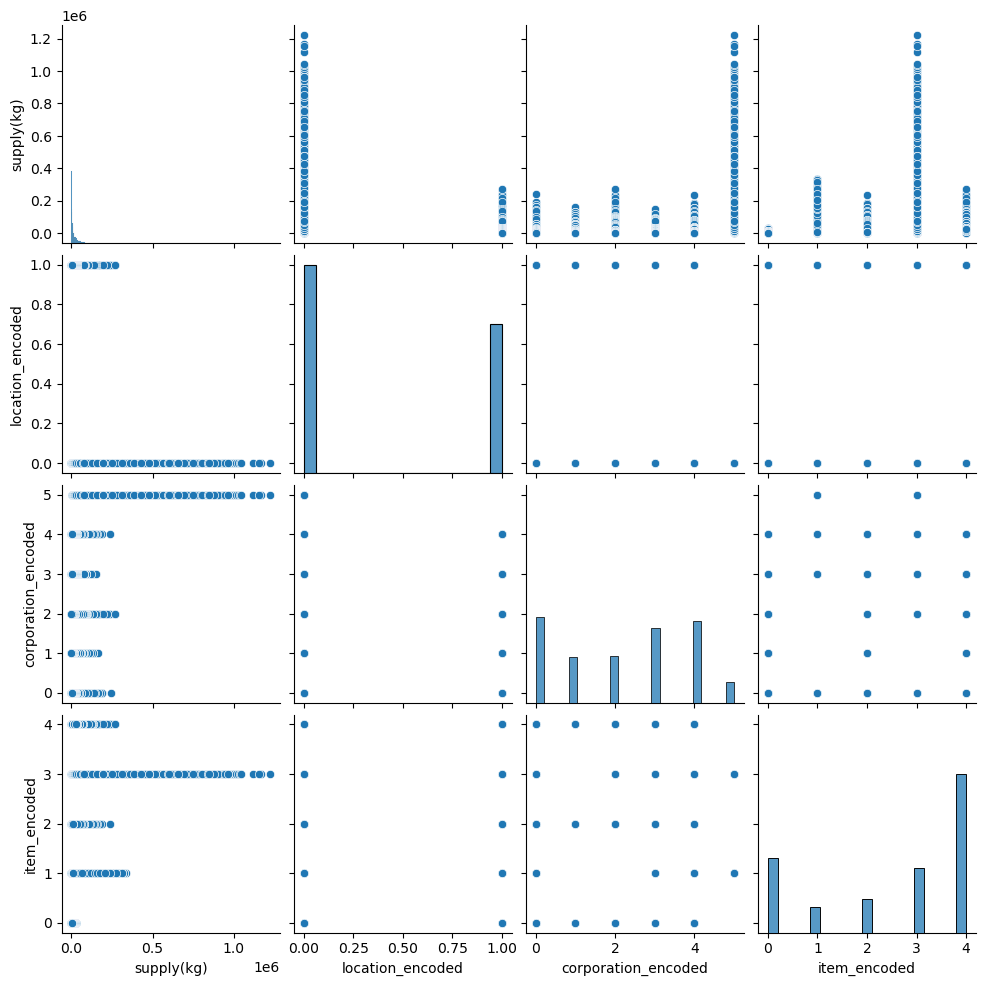

In [319]:
import numpy as np
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

<Axes: title={'center': 'Heat Map Graph'}>

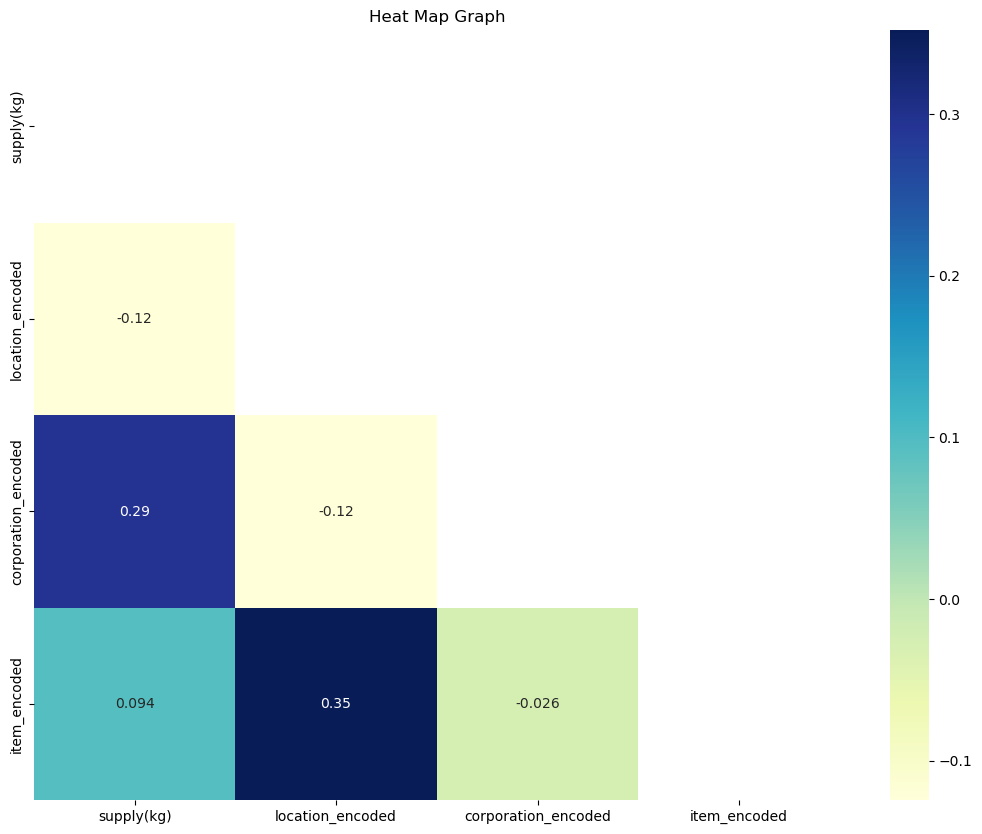

In [323]:
#newdf의 히트맵 작성

plt.figure(figsize=(13,10))
plt.title('Heat Map Graph')

correlation_data = df.corr()
upp_mat = np.triu(correlation_data)
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', mask=upp_mat)

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [259]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 1586.0443168512245


In [260]:
df.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [261]:
df = df[df['supply(kg)']!=0]

In [262]:
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [263]:
df.drop(columns=['ID'],inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/3230655460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ID'],inplace=True)


In [264]:
df

,timestamp,item,corporation,location,supply(kg),price(원/kg)
2,2019-01-03,TG,A,J,60601.0,1728.0
3,2019-01-04,TG,A,J,25000.0,1408.0
4,2019-01-05,TG,A,J,32352.0,1250.0
6,2019-01-07,TG,A,J,44995.0,1474.0
7,2019-01-08,TG,A,J,26975.0,1326.0
...,...,...,...,...,...,...
59392,2023-02-27,RD,F,J,452440.0,468.0
59393,2023-02-28,RD,F,J,421980.0,531.0
59394,2023-03-01,RD,F,J,382980.0,574.0
59395,2023-03-02,RD,F,J,477220.0,523.0


In [265]:
df.drop(columns=['timestamp'],inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2989131888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['timestamp'],inplace=True)


In [266]:
df

,item,corporation,location,supply(kg),price(원/kg)
2,TG,A,J,60601.0,1728.0
3,TG,A,J,25000.0,1408.0
4,TG,A,J,32352.0,1250.0
6,TG,A,J,44995.0,1474.0
7,TG,A,J,26975.0,1326.0
...,...,...,...,...,...
59392,RD,F,J,452440.0,468.0
59393,RD,F,J,421980.0,531.0
59394,RD,F,J,382980.0,574.0
59395,RD,F,J,477220.0,523.0


In [267]:
df['item'].value_counts()

TG    11677
BC     4525
RD     4040
CR     2082
CB     1621
Name: item, dtype: int64

In [268]:
df['corporation'].value_counts()

A    5810
E    5199
D    4921
C    3395
B    3232
F    1388
Name: corporation, dtype: int64

In [269]:
df['location'].value_counts()

J    14930
S     9015
Name: location, dtype: int64

<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


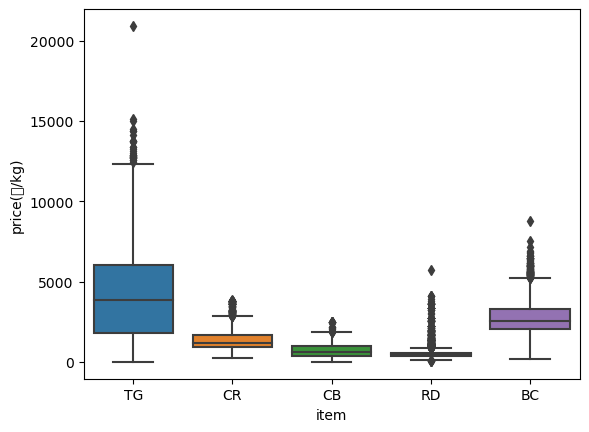

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=df)


In [271]:
df.drop(df[(df['price(원/kg)']>13000)&(df['item']=='TG')].index,inplace=True)


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/3417755542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>13000)&(df['item']=='TG')].index,inplace=True)


<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


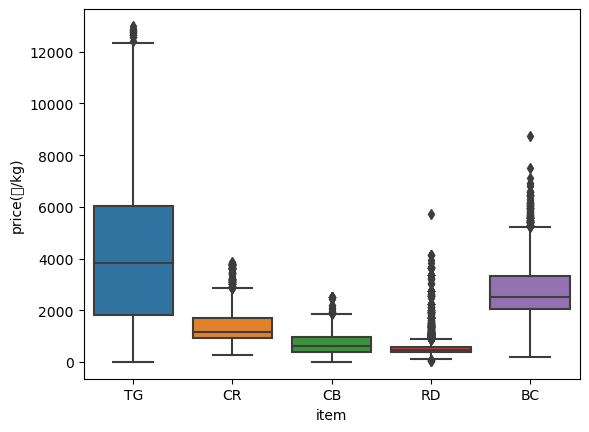

In [272]:
sns.boxplot(x='item',y='price(원/kg)',data=df)


In [273]:
df.drop(df[(df['price(원/kg)']>3000)&(df['item']=='CR')].index,inplace=True)


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2174802147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>3000)&(df['item']=='CR')].index,inplace=True)


<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


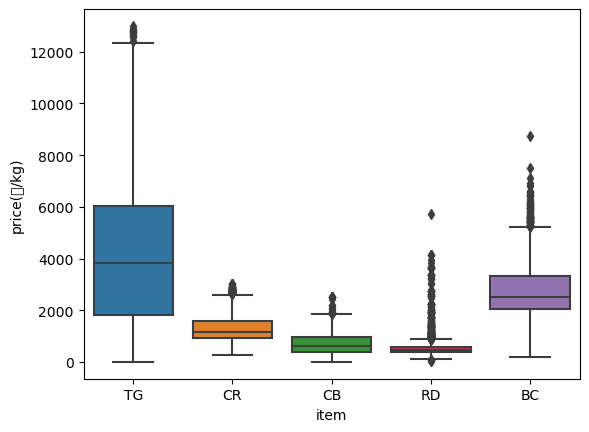

In [274]:
sns.boxplot(x='item',y='price(원/kg)',data=df)


In [275]:
df.drop(df[(df['price(원/kg)']>2000)&(df['item']=='CB')].index,inplace=True)


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/1729333179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>2000)&(df['item']=='CB')].index,inplace=True)


<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


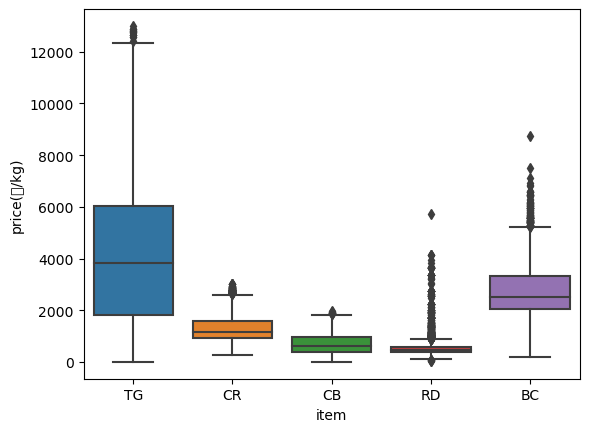

In [276]:
sns.boxplot(x='item',y='price(원/kg)',data=df)


In [277]:
df.drop(df[(df['price(원/kg)']>1000)&(df['item']=='RD')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2284073463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>1000)&(df['item']=='RD')].index,inplace=True)


<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


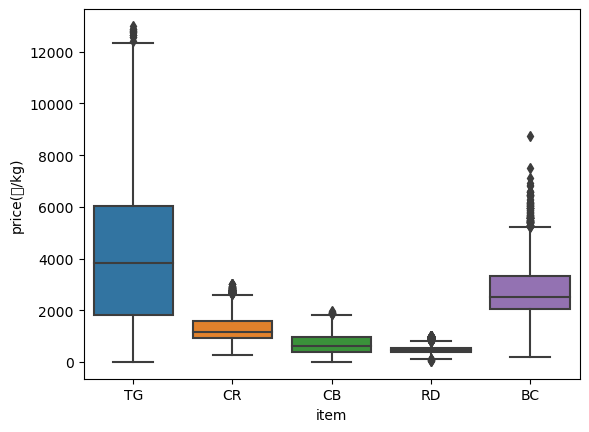

In [278]:
sns.boxplot(x='item',y='price(원/kg)',data=df)


In [279]:
df.drop(df[(df['price(원/kg)']>5500)&(df['item']=='BC')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2342093643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>5500)&(df['item']=='BC')].index,inplace=True)


<Axes: xlabel='item', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


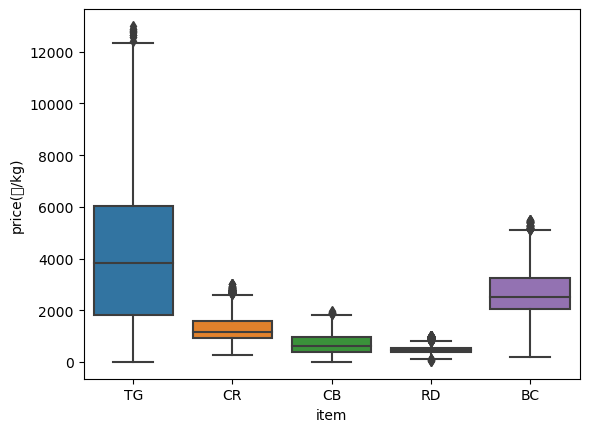

In [280]:
sns.boxplot(x='item',y='price(원/kg)',data=df)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


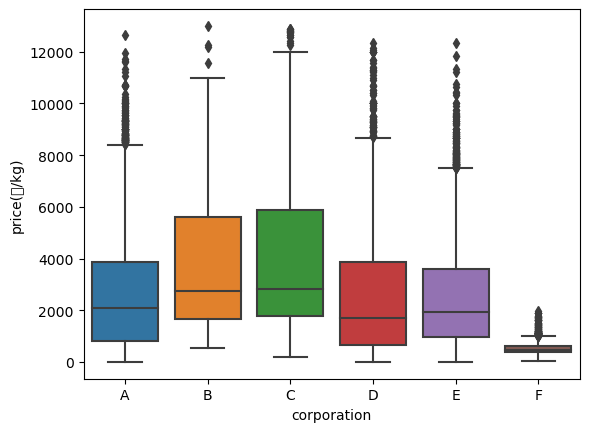

In [281]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [282]:
df.drop(df[(df['price(원/kg)']>7500)&(df['corporation']=='A')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/3087391459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>7500)&(df['corporation']=='A')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


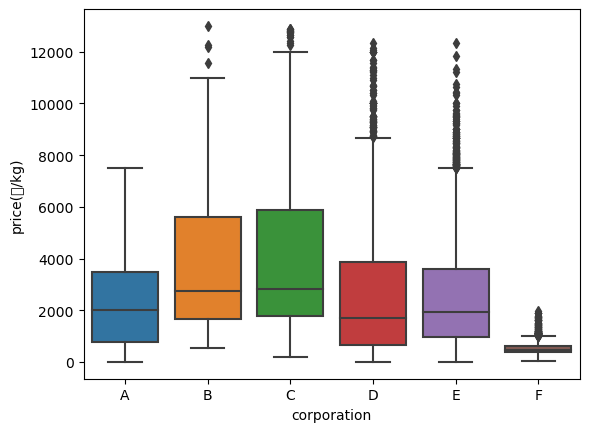

In [283]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [284]:
df.drop(df[(df['price(원/kg)']>11000)&(df['corporation']=='B')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/230102490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>11000)&(df['corporation']=='B')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


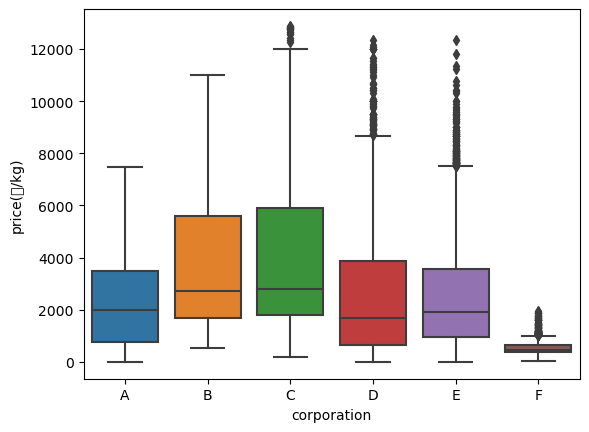

In [285]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [286]:
df.drop(df[(df['price(원/kg)']>12000)&(df['corporation']=='C')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2576826888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>12000)&(df['corporation']=='C')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


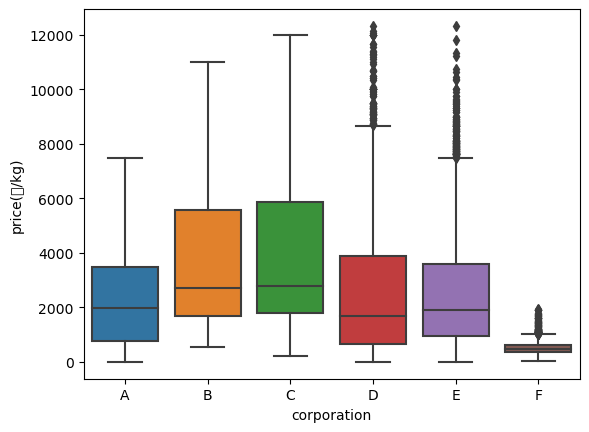

In [287]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [288]:
df.drop(df[(df['price(원/kg)']>9000)&(df['corporation']=='D')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/232276632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>9000)&(df['corporation']=='D')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


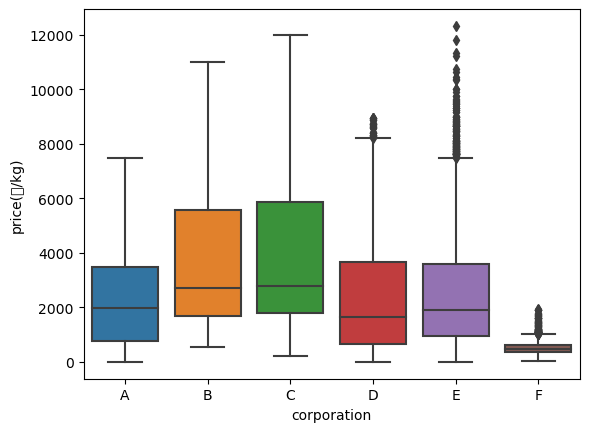

In [289]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [290]:
df.drop(df[(df['price(원/kg)']>8000)&(df['corporation']=='E')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/1486902163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>8000)&(df['corporation']=='E')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


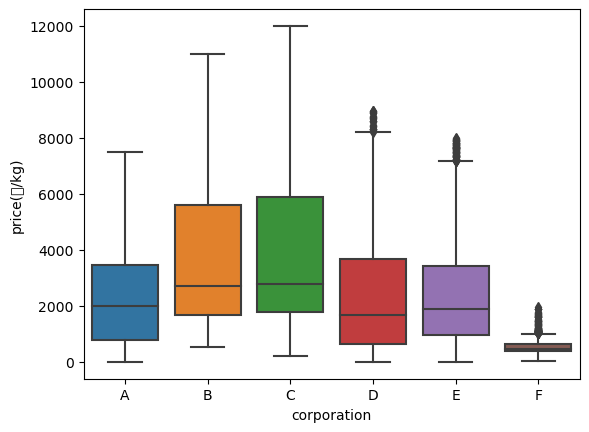

In [291]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


In [292]:
df.drop(df[(df['price(원/kg)']>1000)&(df['corporation']=='F')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/4085533234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>1000)&(df['corporation']=='F')].index,inplace=True)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


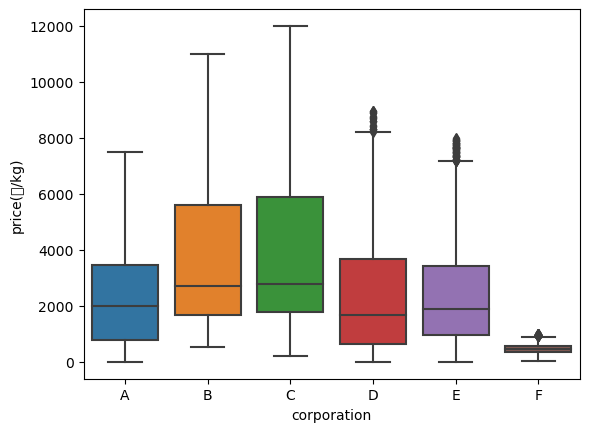

In [293]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)


<Axes: xlabel='location', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


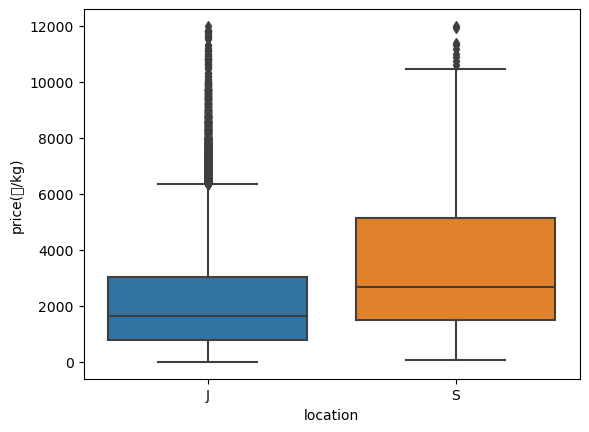

In [294]:
sns.boxplot(x='location',y='price(원/kg)',data=df)

In [295]:
df.drop(df[(df['price(원/kg)']>5000)&(df['location']=='J')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/1063275733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>5000)&(df['location']=='J')].index,inplace=True)


<Axes: xlabel='location', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


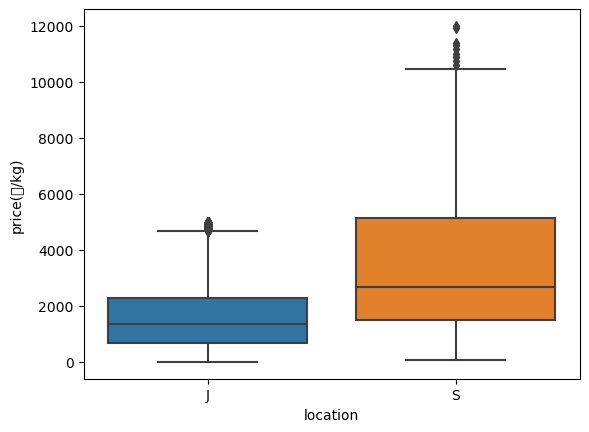

In [296]:
sns.boxplot(x='location',y='price(원/kg)',data=df)

In [297]:
df.drop(df[(df['price(원/kg)']>10000)&(df['location']=='S')].index,inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/254677131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['price(원/kg)']>10000)&(df['location']=='S')].index,inplace=True)


<Axes: xlabel='location', ylabel='price(원/kg)'>

/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


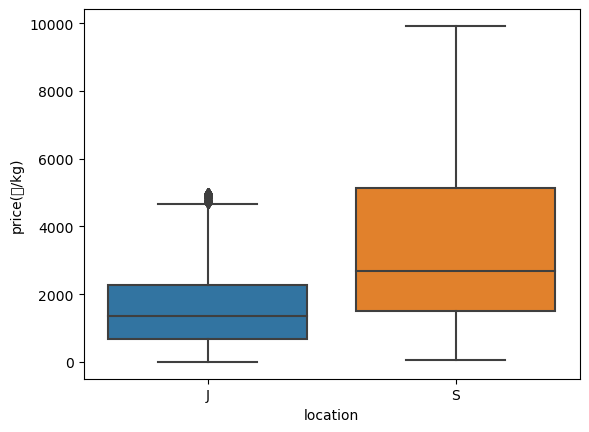

In [298]:
sns.boxplot(x='location',y='price(원/kg)',data=df)

/Users/dongha/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/Users/dongha/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


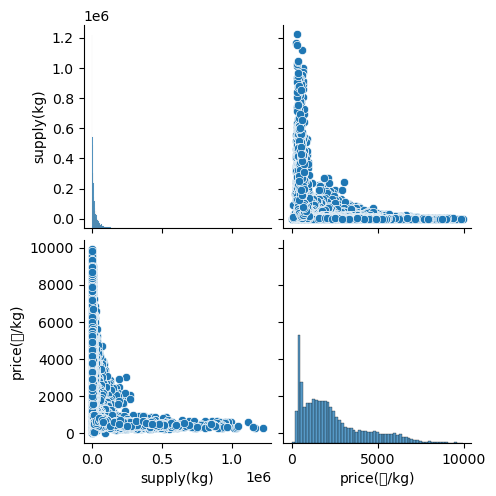

In [299]:
import numpy as np
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

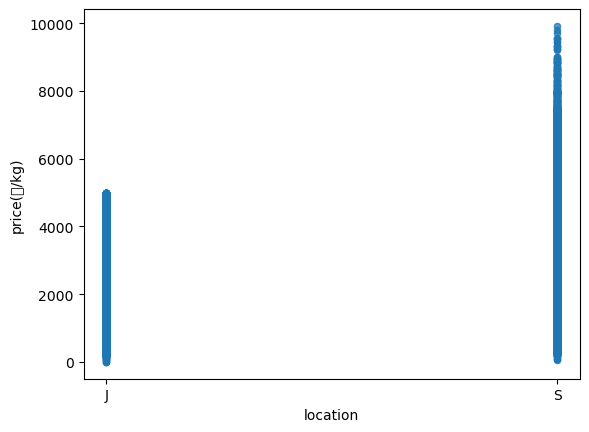

In [300]:
df.plot.scatter("location", "price(원/kg)",alpha=0.75)
plt.show()
plt.close()

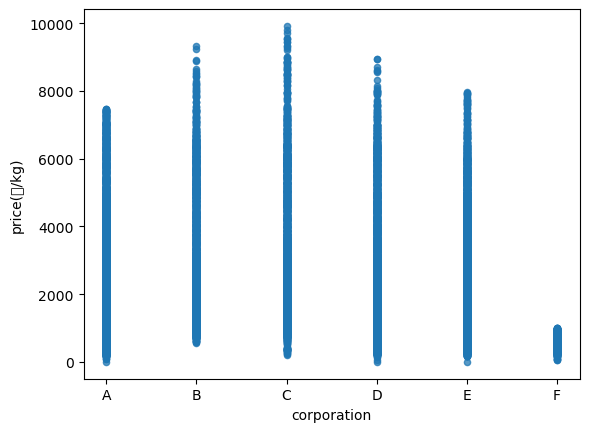

In [301]:
df.plot.scatter("corporation", "price(원/kg)",alpha=0.75)
plt.show()
plt.close()

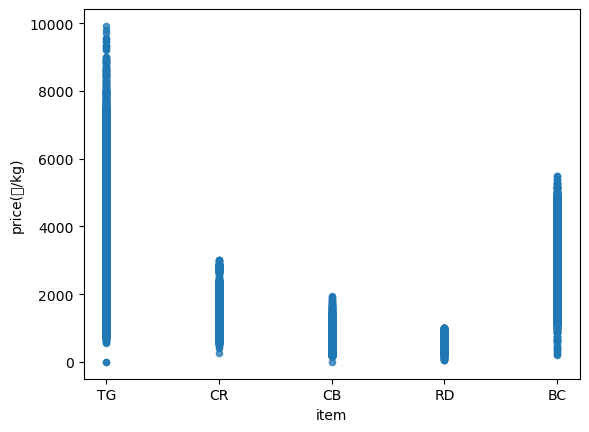

In [302]:
df.plot.scatter("item", "price(원/kg)",alpha=0.75)
plt.show()
plt.close()

In [303]:
from sklearn.preprocessing import LabelEncoder


In [304]:
label_encoder = LabelEncoder()
df['location_encoded'] = label_encoder.fit_transform(df['location'])


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/444440670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_encoded'] = label_encoder.fit_transform(df['location'])


In [305]:
df['location_encoded'].value_counts()

0    12289
1     8784
Name: location_encoded, dtype: int64

In [306]:
label_encoder = LabelEncoder()
df['corporation_encoded'] = label_encoder.fit_transform(df['corporation'])


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/3924059968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corporation_encoded'] = label_encoder.fit_transform(df['corporation'])


In [307]:
df['location_encoded'].value_counts()

0    12289
1     8784
Name: location_encoded, dtype: int64

In [308]:
label_encoder = LabelEncoder()
df['item_encoded'] = label_encoder.fit_transform(df['item'])


/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2453858730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_encoded'] = label_encoder.fit_transform(df['item'])


In [309]:
df['item_encoded'].value_counts()

4    9372
0    4403
3    3794
2    1996
1    1508
Name: item_encoded, dtype: int64

In [310]:
df

,item,corporation,location,supply(kg),price(원/kg),location_encoded,corporation_encoded,item_encoded
2,TG,A,J,60601.0,1728.0,0,0,4
3,TG,A,J,25000.0,1408.0,0,0,4
4,TG,A,J,32352.0,1250.0,0,0,4
6,TG,A,J,44995.0,1474.0,0,0,4
7,TG,A,J,26975.0,1326.0,0,0,4
...,...,...,...,...,...,...,...,...
59392,RD,F,J,452440.0,468.0,0,5,3
59393,RD,F,J,421980.0,531.0,0,5,3
59394,RD,F,J,382980.0,574.0,0,5,3
59395,RD,F,J,477220.0,523.0,0,5,3


In [311]:
df.drop(columns=['item','corporation','location'],inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/2860670240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['item','corporation','location'],inplace=True)


In [312]:
df

,supply(kg),price(원/kg),location_encoded,corporation_encoded,item_encoded
2,60601.0,1728.0,0,0,4
3,25000.0,1408.0,0,0,4
4,32352.0,1250.0,0,0,4
6,44995.0,1474.0,0,0,4
7,26975.0,1326.0,0,0,4
...,...,...,...,...,...
59392,452440.0,468.0,0,5,3
59393,421980.0,531.0,0,5,3
59394,382980.0,574.0,0,5,3
59395,477220.0,523.0,0,5,3


In [313]:
y=df['price(원/kg)']

In [314]:
df.drop(columns=['price(원/kg)'],inplace=True)

/var/folders/nb/f9dwf8n129l47qrtly4r5_nc0000gn/T/ipykernel_2822/3366662555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price(원/kg)'],inplace=True)


In [315]:
df.columns

Index(['supply(kg)', 'location_encoded', 'corporation_encoded',
       'item_encoded'],
      dtype='object')

In [316]:
X=df[['supply(kg)', 'location_encoded', 'corporation_encoded',
       'item_encoded']]

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [318]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()

model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error



ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 1594.7155250983092
